## Bike Sharing Demand

<br>

 Predict demand of bike by Machine Learing

### Introduction

<img src="https://storage.googleapis.com/kaggle-competitions/kaggle/3948/media/bikes.png" alt="Random Search for Hyper-Parameter Optimization" style="width: 720px;"/>

<p style="text-align: center;">
  <small>
    [See <a href="https://www.kaggle.com/c/bike-sharing-demand/overview">Bike Sharing Demand (Kaggle URL)</a>]
  </small>
</p>

#####  Data

See, fork, and run a **random forest** benchmark model through Kaggle Scripts

- Period of bike rental data : 2 years
- train dataset : 19 days(1st ~ 19th) each month
- test dataset : about 10 days(20th ~ last) each month

We must predict the total count of bikes rented during 2 years for each month, hour.

- datetime - hourly date + timestamp (Year + Month + Day + Hour + Minutes + Seconds) 
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
  (If it is not holiday or workingday, it will be **weekend**)
- weather 

  * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  
  * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  
  * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  
  * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
  
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals (casual + registered)

$$ casual + registered = count $$

- **Evaluation** : Submissions are evaluated one the Root Mean Squared Logarithmic Error (**RMSLE**). The RMSLE is calculated as

<br>

$$ RMSLE = \sqrt {\frac{1}{n}\sum\limits_{i=1}^n(log(p_i+1) - log(a_i + 1))^2} $$

### Import Library

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("whitegrid")

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier as GBM
from sklearn.svm import SVC

### Import CSV file

In [169]:
train = pd.read_csv("../Bike_Sharing_Demand/data/train.csv")
test = pd.read_csv("../Bike_Sharing_Demand/data/test.csv")
sub_sample = pd.read_csv("../Bike_Sharing_Demand/data/sampleSubmission.csv")

In [170]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [171]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [172]:
sub_sample.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [173]:
print(train.shape, test.shape)
print(train.info(), test.info())

(10886, 12) (6493, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 

In [174]:
print(train.isnull().sum(), test.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64 datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64


### EDA

<AxesSubplot:>

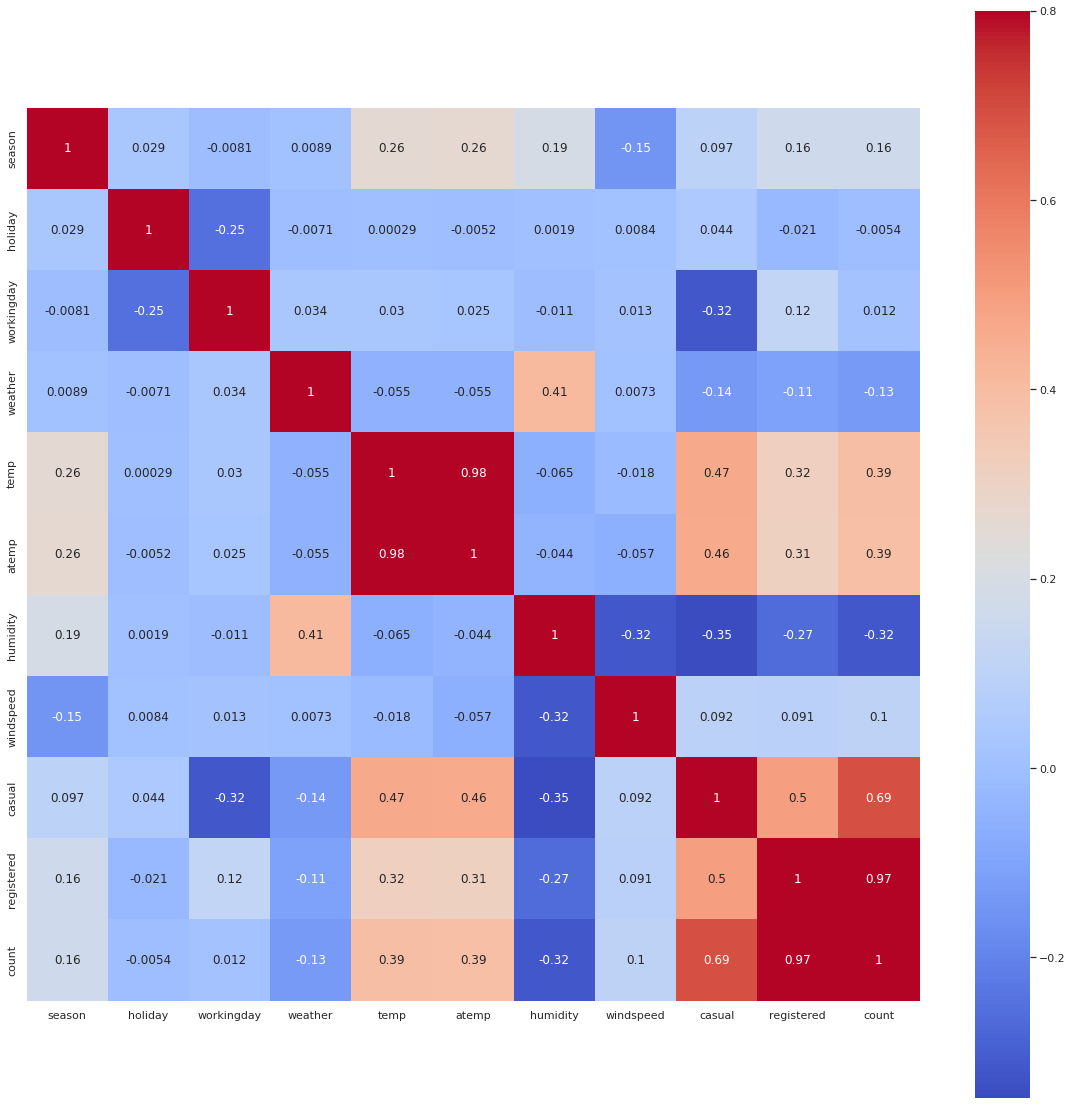

In [175]:
cols = list(train.columns)
corr = train[cols].corr()
mask = np.array(corr)

plt.figure(figsize=(20,20))
sns.heatmap(corr, vmax=0.8, square=True, annot=True, cmap="coolwarm")

In [176]:
type(train['datetime'].iloc[0])

str

In [177]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [178]:
type(train['datetime'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [179]:
dataset = [train, test]

##### Datetime

In [180]:
for data in dataset:
    data['datetime'] = pd.to_datetime(data['datetime'])
    data['year'] = data['datetime'].dt.year
    data['month'] = data['datetime'].dt.month
    data['day'] = data['datetime'].dt.day
    data['hour'] = data['datetime'].dt.hour
    data['minute'] = data['datetime'].dt.minute
    data['second'] = data['datetime'].dt.second

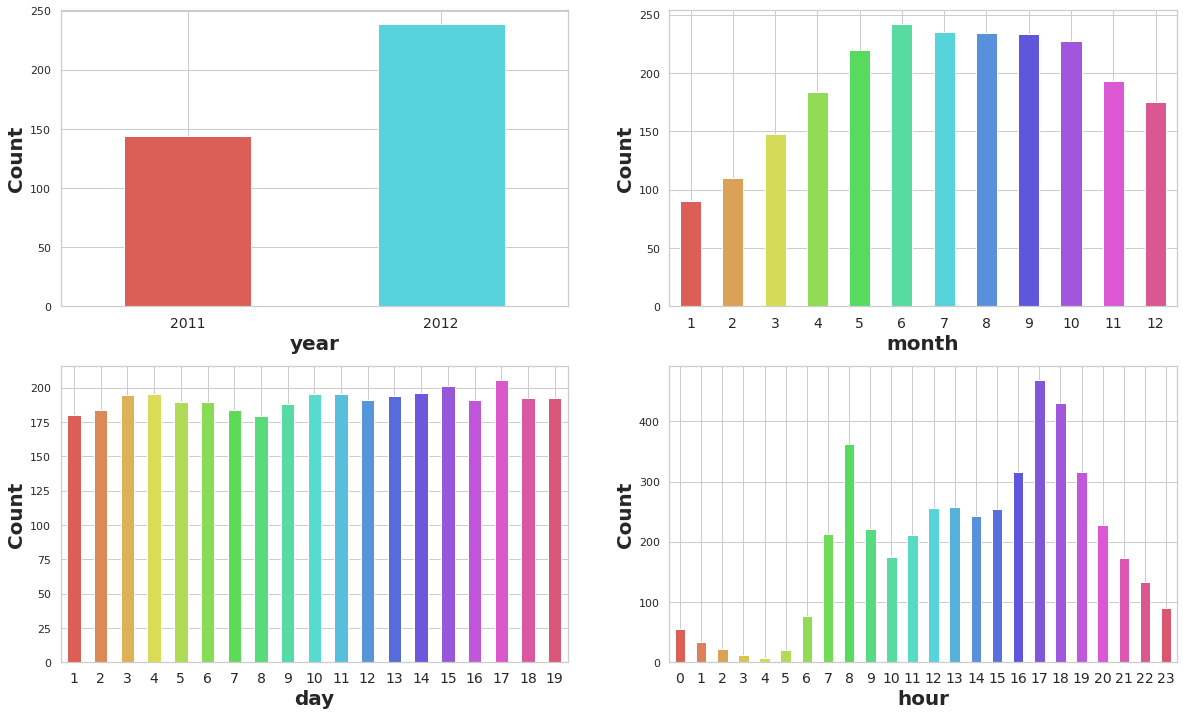

In [181]:
plt.subplots(figsize=(20,12))

col_list = ['year', 'month', 'day', 'hour']

for i in range(len(col_list)):
    plt.subplot(2,2,i+1)
    
    col_uni = train[col_list[i]].unique()
    colors = sns.color_palette('hls',len(col_uni))
    
    train.groupby(col_list[i])['count'].mean().plot(kind='bar', color=colors)
    plt.xlabel(col_list[i], fontsize=20, weight='bold')
    plt.ylabel('Count', fontsize=20, weight='bold')
    plt.xticks(fontsize=14, rotation=0)

- Minute & Second : Drop! (No meanings) + day : Drop! (We have to predict after 20th)
- year_month : Need!

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23')]

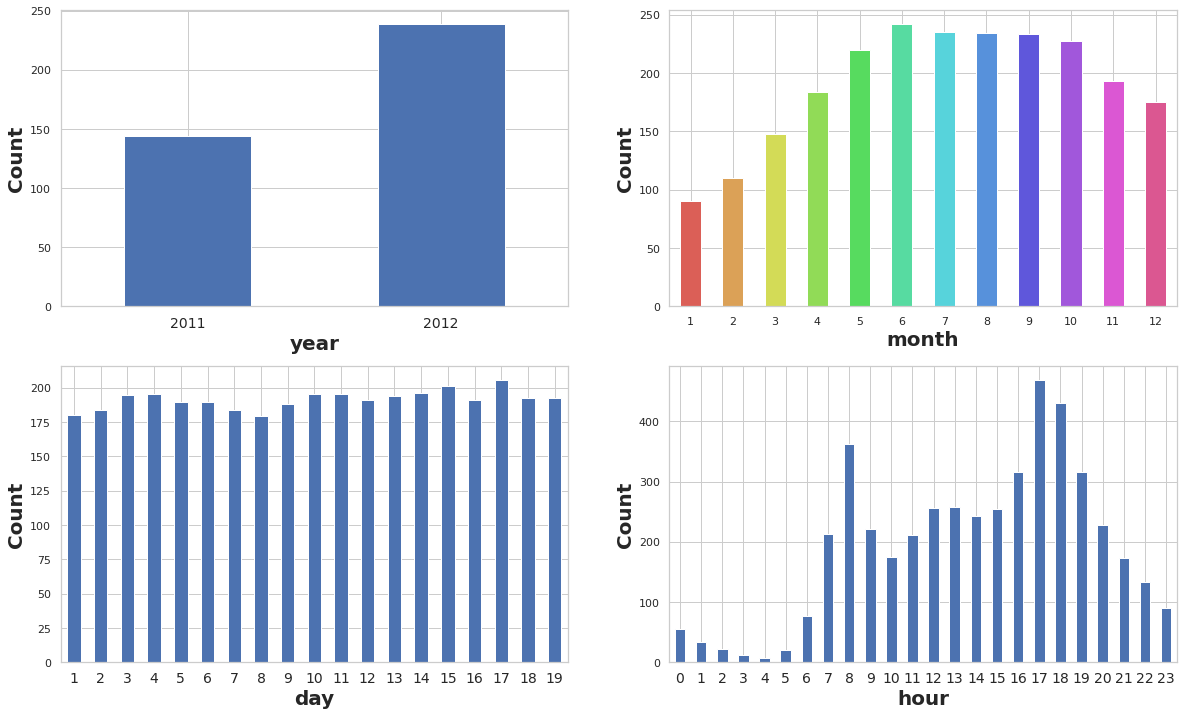

In [182]:
figure, ((ax1, ax2),(ax3,ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

colors = sns.color_palette('hls',len(train['month'].unique()))

train.groupby('year')['count'].mean().plot(kind='bar', ax=ax1)
ax1.set_xlabel('year', fontsize=20, weight='bold')
ax1.set_ylabel('Count', fontsize=20, weight='bold')
ax1.set_xticklabels(train['year'].unique(),fontsize=14, rotation=0)

train.groupby('month')['count'].mean().plot(kind='bar', ax=ax2, color=colors)
ax2.set_xlabel('month', fontsize=20, weight='bold')
ax2.set_ylabel('Count', fontsize=20, weight='bold')
ax2.set_xticklabels(train['month'].unique(),rotation=0)

train.groupby('day')['count'].mean().plot(kind='bar', ax=ax3)
ax3.set_xlabel('day', fontsize=20, weight='bold')
ax3.set_ylabel('Count', fontsize=20, weight='bold')
ax3.set_xticklabels(train['day'].unique(),fontsize=14, rotation=0)

train.groupby('hour')['count'].mean().plot(kind='bar', ax=ax4)
ax4.set_xlabel('hour', fontsize=20, weight='bold')
ax4.set_ylabel('Count', fontsize=20, weight='bold')
ax4.set_xticklabels(train['hour'].unique(),fontsize=14, rotation=0)

In [183]:
for data in dataset:
    data.drop(columns=['day', 'minute', 'second'], axis=1, inplace=True)

In [184]:
def make_year_month(df):
    return df.strftime("%Y%m")

In [185]:
for data in dataset:
    data['year_month'] = data['datetime'].apply(make_year_month)

<AxesSubplot:xlabel='year_month'>

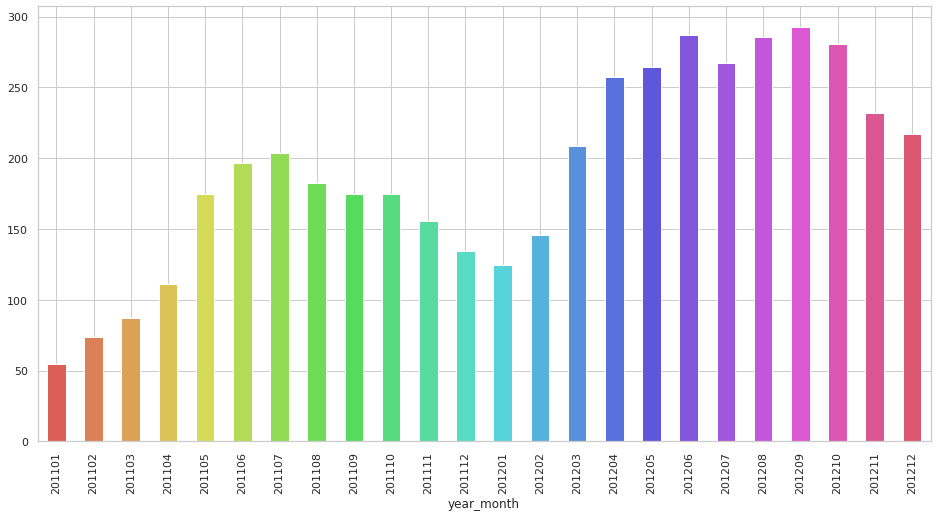

In [186]:
colors = sns.color_palette('hls',len(train['year_month'].unique()))
train.groupby('year_month')['count'].mean().plot(kind='bar', figsize=(16, 8), color=colors)

##### Season

In [187]:
train['season'].isna().sum(), test['season'].isna().sum()

(0, 0)

In [188]:
train['season'].value_counts(), test['season'].value_counts()

(4    2734
 2    2733
 3    2733
 1    2686
 Name: season, dtype: int64,
 3    1763
 2    1676
 1    1556
 4    1498
 Name: season, dtype: int64)

(array([0, 1, 2, 3]),
 [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3'), Text(3, 0, '4')])

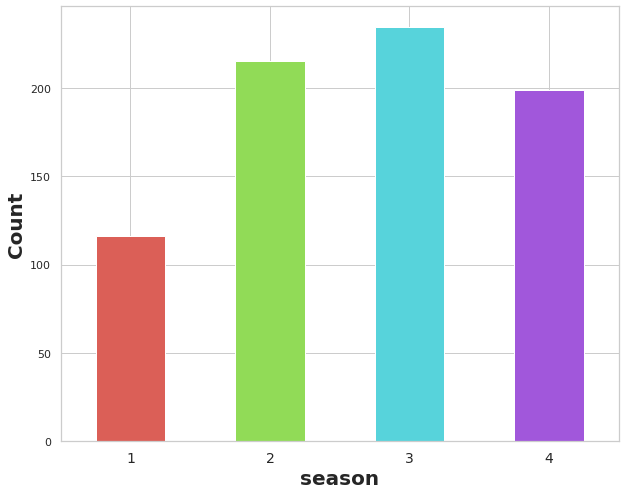

In [189]:
col_uni = train['season'].unique()
colors = sns.color_palette('hls',len(col_uni))
train.groupby('season')["count"].mean().plot(kind='bar', color=colors, figsize=(10,8))
plt.xlabel('season', fontsize=20, weight='bold')
plt.ylabel('Count', fontsize=20, weight='bold')
plt.xticks(fontsize=14, rotation=0)

##### holiday & workingday

In [190]:
train['holiday'].isna().sum(), test['holiday'].isna().sum()

(0, 0)

In [191]:
train['workingday'].isna().sum(), test['workingday'].isna().sum()

(0, 0)

In [192]:
train['workingday'].value_counts(), test['workingday'].value_counts()

(1    7412
 0    3474
 Name: workingday, dtype: int64,
 1    4453
 0    2040
 Name: workingday, dtype: int64)

In [193]:
train['holiday'].value_counts(), test['holiday'].value_counts()

(0    10575
 1      311
 Name: holiday, dtype: int64,
 0    6304
 1     189
 Name: holiday, dtype: int64)

In [194]:
for data in dataset:
    data['weekend'] = (data['holiday'] == 0) & (data['workingday']==0)

##### weather

In [195]:
train['weather'].isna().sum(), train['weather'].value_counts()

(0,
 1    7192
 2    2834
 3     859
 4       1
 Name: weather, dtype: int64)

In [196]:
test['weather'].isna().sum(), test['weather'].value_counts()

(0,
 1    4221
 2    1710
 3     560
 4       2
 Name: weather, dtype: int64)

In [197]:
for data in dataset:
    data.loc[data['weather'] == 4, 'weather'] = 3

(array([0, 1, 2]), [Text(0, 0, '1'), Text(1, 0, '2'), Text(2, 0, '3')])

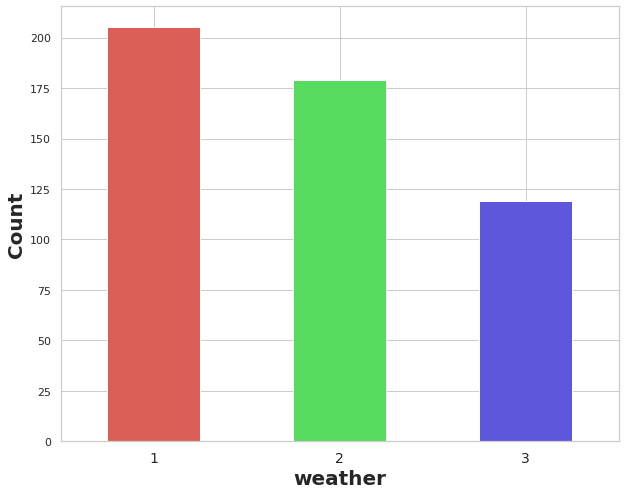

In [198]:
col_uni = train['weather'].unique()
colors = sns.color_palette('hls',len(col_uni))

train.groupby('weather')["count"].mean().plot(kind='bar', color=colors, figsize=(10,8))
plt.xlabel('weather', fontsize=20, weight='bold')
plt.ylabel('Count', fontsize=20, weight='bold')
plt.xticks(fontsize=14, rotation=0)

##### temp & atemp

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='temp', ylabel='atemp'>

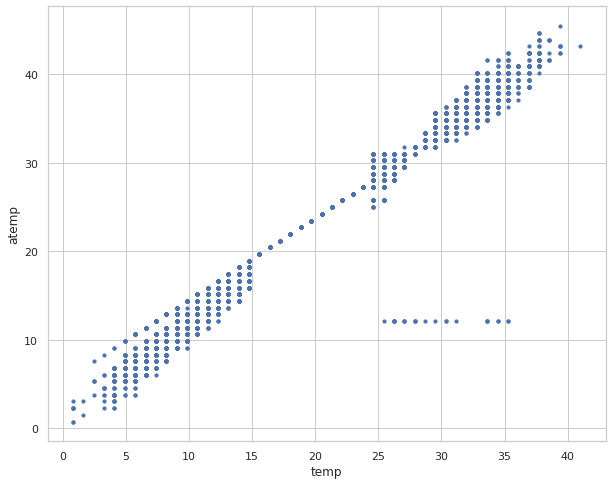

In [199]:
train.plot.scatter(x='temp', y='atemp', figsize=(10,8),s=10, colormap='hot')

In [200]:
 for data in dataset:
    data['temp_int'] = data['temp'].round()
    data['atemp_int'] = data['atemp'].round()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='temp_int', ylabel='atemp_int'>

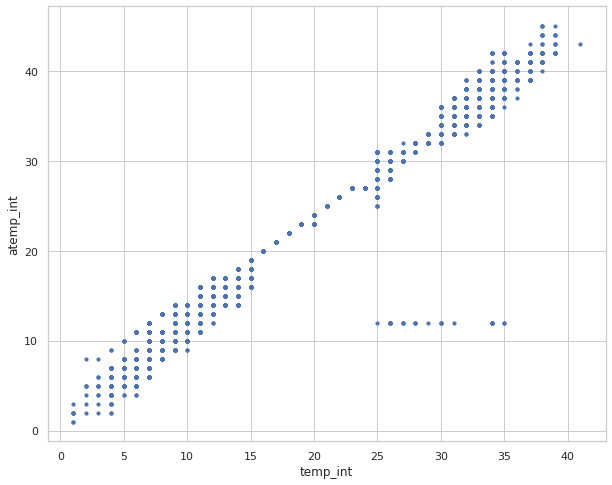

In [201]:
train.plot.scatter(x='temp_int', y='atemp_int', figsize=(10,8),s=10, colormap='hot')

In [202]:
temp_df = train.loc[(train['temp'] < 25) | (train['atemp'] > 20)]
function = np.polyfit(temp_df['temp_int'], temp_df['atemp_int'],1)
a = np.round(function[0],2)
b = np.round(function[1],2)

In [203]:
for data in dataset:
    data['atemp_int_enc'] = data.loc[(data['temp'] > 25) & (data['atemp'] < 20)]['temp_int'] * a + b
    data.loc[data['atemp_int_enc'].isna(), "atemp_int_enc"] = data['atemp_int']
    data['atemp_int_enc'] = data['atemp_int_enc'].round()

KeyError: 'temp_int'

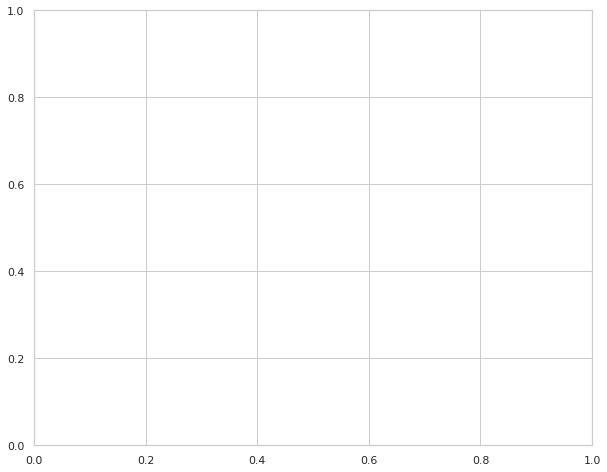

In [211]:
train.plot.scatter(x='temp_int', y='atemp_int_enc', figsize=(10,8),s=10) #, colormap='hot'

In [208]:
for data in dataset:
    data['temp_atemp'] = data['temp_int'] - data['atemp_int_enc']
    data.drop(columns=['temp', 'atemp','year', 'month', 'temp_int','atemp_int', 'atemp_int_enc'], 
             axis=1, inplace=True)

<AxesSubplot:xlabel='temp_atemp'>

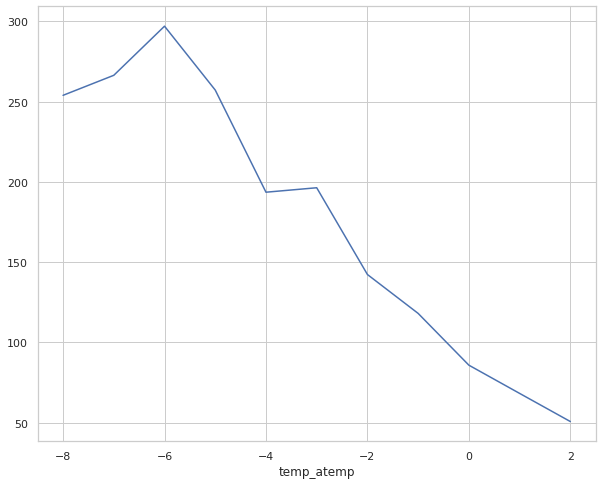

In [209]:
train.groupby('temp_atemp')['count'].mean().plot(kind='line', figsize = (10,8))

##### Windspeed

(0.0, 60.0)

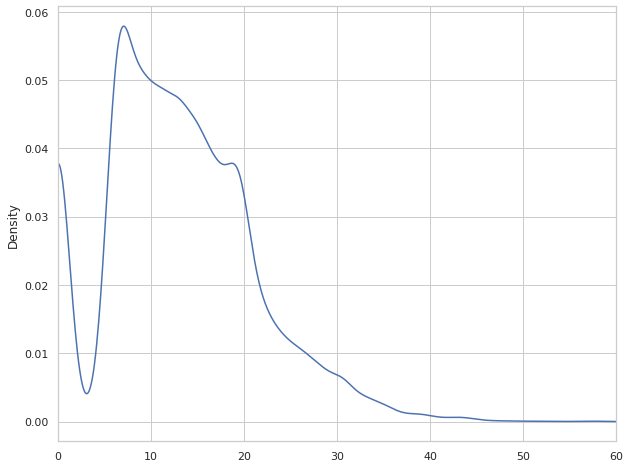

In [217]:
train['windspeed'].plot(kind='kde', figsize=(10,8))
plt.xlim([0, 60])

In [237]:
for data in dataset:
    data['windspeed_enc'] = data['windspeed'].round().copy()
    data.loc[data['windspeed_enc'] == 0, 'windspeed_enc'] = round(data['windspeed'].mean(),0)
    data.drop(columns='windspeed', axis=1, inplace=True)

(0.0, 60.0)

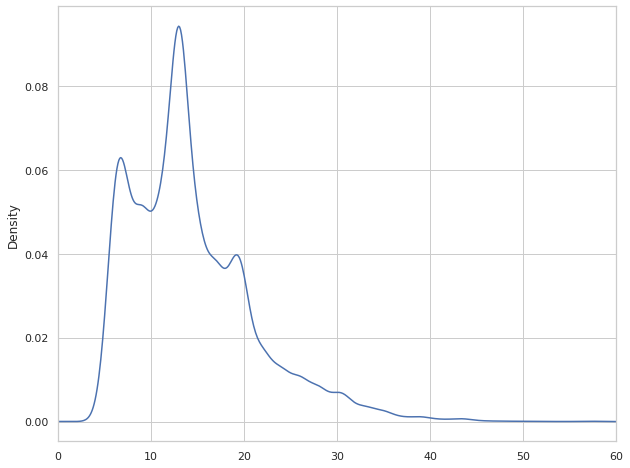

In [238]:
train['windspeed_enc'].plot(kind='kde', figsize=(10,8))
plt.xlim([0, 60])

##### weather

(0.0, 100.0)

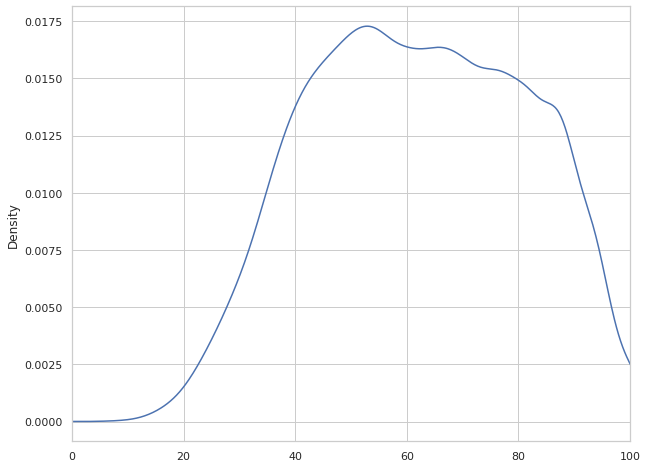

In [277]:
train['humidity'].plot(kind='kde', figsize=(10,8))
plt.xlim([0, 100])

<AxesSubplot:xlabel='humidity'>

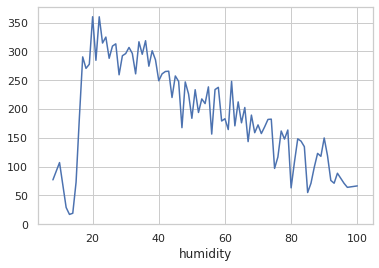

In [288]:
train.groupby('humidity')['count'].mean().plot(kind='line')

In [302]:
for data in dataset:
    data.loc[data['humidity'] == 0, 'humidity'] = int(data['humidity'].mean())
    data['humidity_1'] = data['humidity'] < 20
    data['humidity_2'] = (data['humidity'] >= 20) & (data['humidity'] < 40)
    data['humidity_3'] = (data['humidity'] >= 40) & (data['humidity'] < 60)
    data['humidity_4'] = (data['humidity'] >= 60) & (data['humidity'] < 80)
    data['humidity_5'] = (data['humidity'] >= 80)
    data.drop(columns='humidity', axis=1, inplace=True)

In [304]:
for data in dataset:
    data.drop(columns='datetime', axis=1, inplace=True) 

### ML Modeling

In [306]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'casual', 'registered',
       'count', 'hour', 'year_month', 'weekend', 'temp_atemp', 'windspeed_enc',
       'humidity_1', 'humidity_2', 'humidity_3', 'humidity_4', 'humidity_5'],
      dtype='object')

In [358]:
test.columns

Index(['season', 'holiday', 'workingday', 'weather', 'hour', 'year_month',
       'weekend', 'temp_atemp', 'windspeed_enc', 'humidity_1', 'humidity_2',
       'humidity_3', 'humidity_4', 'humidity_5'],
      dtype='object')

In [359]:
x_train = train[train.columns.difference(['casual', 'registered','count'])]
y_train = train['count']
x_test = test

In [360]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [367]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

model = RandomForestRegressor(n_estimators = 1000, n_jobs=-1)

%time score = cross_val_score(model, x_train, y_train, cv=k_fold, n_jobs=-1, scoring=rmsle_scorer)
score = score.mean()

print(f"{str(model)} Score : {np.round(score,2)}")
print("Score= {0:.5f}".format(score))

CPU times: user 95.6 ms, sys: 23.2 ms, total: 119 ms
Wall time: 46.7 s
RandomForestRegressor(n_estimators=1000, n_jobs=-1) Score : 0.36
Score= 0.35514


In [368]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
y_pred.shape

/home/chahohyun/anaconda3/lib/python3.7/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


(6493,)

In [369]:
sub_sample['count'] = y_pred

sub_sample.to_csv("./data/Submission.csv", index=False)

In [370]:
sub_sample

,datetime,count
0,2011-01-20 00:00:00,18.012233
1,2011-01-20 01:00:00,18.337192
2,2011-01-20 02:00:00,18.337192
3,2011-01-20 03:00:00,18.337192
4,2011-01-20 04:00:00,18.337192
...,...,...
6488,2012-12-31 19:00:00,10.415675
6489,2012-12-31 20:00:00,10.415675
6490,2012-12-31 21:00:00,10.415675
6491,2012-12-31 22:00:00,18.337192


In [371]:
pd.read_csv("./data/Submission.csv")

,datetime,count
0,2011-01-20 00:00:00,18.012233
1,2011-01-20 01:00:00,18.337192
2,2011-01-20 02:00:00,18.337192
3,2011-01-20 03:00:00,18.337192
4,2011-01-20 04:00:00,18.337192
...,...,...
6488,2012-12-31 19:00:00,10.415675
6489,2012-12-31 20:00:00,10.415675
6490,2012-12-31 21:00:00,10.415675
6491,2012-12-31 22:00:00,18.337192
